In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv('/content/kidney_disease.csv')
data.shape

(400, 26)

In [5]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [6]:
data.drop('id',axis=1,inplace=True)
data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [10]:
data.columns=['age','blood_pressure','gravity','albin','sugar','redbloodcell','puscell','pccumps','bacteria','glucose','bloodurea','serum','sodium','potasssium','heamoglobin','pcvolume','wbc count','rbccount','hypertension','mellitus','coronary','appetite','peda_edema','animea','class']
data.columns
# data.rename(columns={'age':'agexn'},inplace=True)

Index(['age', 'blood_pressure', 'gravity', 'albin', 'sugar', 'redbloodcell',
       'puscell', 'pccumps', 'bacteria', 'glucose', 'bloodurea', 'serum',
       'sodium', 'potasssium', 'heamoglobin', 'pcvolume', 'wbc count',
       'rbccount', 'hypertension', 'mellitus', 'coronary', 'appetite',
       'peda_edema', 'animea', 'class'],
      dtype='object')

In [ ]:
data.drop('bloodurea',axis=1,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   blood_pressure  388 non-null    float64
 2   gravity         353 non-null    float64
 3   albin           354 non-null    float64
 4   sugar           351 non-null    float64
 5   redbloodcell    248 non-null    object 
 6   puscell         335 non-null    object 
 7   pccumps         396 non-null    object 
 8   bacteria        396 non-null    object 
 9   glucose         356 non-null    float64
 10  serum           383 non-null    float64
 11  sodium          313 non-null    float64
 12  potasssium      312 non-null    float64
 13  heamoglobin     348 non-null    float64
 14  pcvolume        330 non-null    object 
 15  wbc count       295 non-null    object 
 16  rbccount        270 non-null    object 
 17  hypertension    398 non-null    obj

In [ ]:
data.head()

,age,blood_pressure,gravity,albin,sugar,redbloodcell,puscell,pccumps,bacteria,glucose,...,pcvolume,wbc count,rbccount,hypertension,mellitus,coronary,appetite,peda_edema,animea,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
text_columns=['pcvolume','wbc count','rbccount']
for i in text_columns:
    print(f"{i}:{data[i].dtype}")

pcvolume:object
wbc count:object
rbccount:object


In [ ]:
def numeric (data,column):
    data[column]=pd.to_numeric(data[column],errors='coerce')
for column in text_columns:
    numeric(data,column)
    print(f"{column}:{data[column].dtype}")

pcvolume:float64
wbc count:float64
rbccount:float64


In [ ]:
data.shape

(400, 24)

In [ ]:
missing=data.isnull().sum()
missing[missing>0].sort_values(ascending=False).head(5)

,0
redbloodcell,152
rbccount,131
wbc count,106
potasssium,88
sodium,87


In [ ]:
def mean(data,column):  # to fill value for integer columns
    mean=data[column].mean()
    data[column].fillna(mean,inplace=True)

def mode(data,column):        # to fill value for categorical columns
    mode=data[column].mode()[0]
    data[column].fillna(mode,inplace=True)

In [ ]:
num_cols=[col for col in data.columns if data[col].dtype!='object']
for column in num_cols:
  mean(data,column)

In [ ]:
cat_cols=[col for col in data.columns if data[col].dtype=='object']
for column in cat_cols:
  mode(data,column)

In [ ]:
data.head()

,age,blood_pressure,gravity,albin,sugar,redbloodcell,puscell,pccumps,bacteria,glucose,...,pcvolume,wbc count,rbccount,hypertension,mellitus,coronary,appetite,peda_edema,animea,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,...,44.0,7800.0,5.200000,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,...,38.0,6000.0,4.707435,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,31.0,7500.0,4.707435,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,35.0,7300.0,4.600000,no,no,no,good,no,no,ckd


In [ ]:
#convert object into numrical
print(f"hypertension:{data['hypertension'].unique()}")
print(f"mellitus:{data['mellitus'].unique()}")
print(f"coronary:{data['coronary'].unique()}")
print(f"appetite:{data['appetite'].unique()}")
print(f"class:{data['class'].unique()}")

hypertension:['yes' 'no']
mellitus:['yes' 'no' ' yes' '\tno' '\tyes']
coronary:['no' 'yes' '\tno']
appetite:['good' 'poor']
class:['ckd' 'ckd\t' 'notckd']


In [ ]:
data['mellitus']=data['mellitus'].replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'})
data['coronary']=data['coronary'].replace(to_replace={'\tno':'no'})
data['class']=data['class'].replace(to_replace={'ckd\t':'ckd'})

In [ ]:
cleanup_dict = {
    'mellitus': {'\tno': 'no', '\tyes': 'yes', ' yes': 'yes'},
    'coronary': {'\tno': 'no'},
    'class': {'ckd\t': 'ckd'}
}

for column, replacements in cleanup_dict.items():
    data[column] = data[column].replace(replacements)

In [ ]:
print(f"hypertension:{data['hypertension'].unique()}")
print(f"mellitus:{data['mellitus'].unique()}")
print(f"coronary:{data['coronary'].unique()}")
print(f"class:{data['class'].unique()}")
print(f"appetite:{data['appetite'].unique()}")

hypertension:['yes' 'no']
mellitus:['yes' 'no']
coronary:['no' 'yes']
class:['ckd' 'notckd']
appetite:['good' 'poor']


In [ ]:
data.columns

Index(['age', 'blood_pressure', 'gravity', 'albin', 'sugar', 'redbloodcell',
       'puscell', 'pccumps', 'bacteria', 'glucose', 'serum', 'sodium',
       'potasssium', 'heamoglobin', 'pcvolume', 'wbc count', 'rbccount',
       'hypertension', 'mellitus', 'coronary', 'appetite', 'peda_edema',
       'animea', 'class'],
      dtype='object')

In [ ]:
data.columns=['age','blood_pressure','gravity','albin','sugar','redbloodcell','puscell','pccumps','bacteria','glucose','serum','sodium','potasssium','heamoglobin','pcvolume','wbc count','rbccount','hypertension','mellitus','coronary','appetite','peda_edema','animea','class']
for column in data.columns:
  print(f"unique value counts for {column}:")
  print(data[column].value_counts().head(20))
  print()

unique value counts for age:
age
60.000000    19
65.000000    17
48.000000    12
50.000000    12
55.000000    12
47.000000    11
56.000000    10
59.000000    10
45.000000    10
54.000000    10
62.000000    10
46.000000     9
61.000000     9
34.000000     9
51.483376     9
70.000000     9
57.000000     8
71.000000     8
64.000000     8
73.000000     8
Name: count, dtype: int64

unique value counts for blood_pressure:
blood_pressure
80.000000     116
70.000000     112
60.000000      71
90.000000      53
100.000000     25
76.469072      12
50.000000       5
110.000000      3
140.000000      1
180.000000      1
120.000000      1
Name: count, dtype: int64

unique value counts for gravity:
gravity
1.020000    106
1.010000     84
1.025000     81
1.015000     75
1.017408     47
1.005000      7
Name: count, dtype: int64

unique value counts for albin:
albin
0.000000    199
1.016949     46
1.000000     44
2.000000     43
3.000000     43
4.000000     24
5.000000      1
Name: count, dtype: int64



In [ ]:
data.head()

,age,blood_pressure,gravity,albin,sugar,redbloodcell,puscell,pccumps,bacteria,glucose,...,pcvolume,wbc count,rbccount,hypertension,mellitus,coronary,appetite,peda_edema,animea,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,...,44.0,7800.0,5.200000,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,...,38.0,6000.0,4.707435,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,31.0,7500.0,4.707435,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,35.0,7300.0,4.600000,no,no,no,good,no,no,ckd


In [ ]:
data['peda_edema']=data['peda_edema'].map({'no':0,'yes':1})
data['animea']=data['animea'].map({'no':0,'yes':1})
data['class']=data['class'].map({'notckd':0,'ckd':1})
data['hypertension']=data['hypertension'].map({'no':0,'yes':1})
data['mellitus']=data['mellitus'].map({'no':0,'yes':1})
data['coronary']=data['coronary'].map({'no':0,'yes':1})
data['appetite']=data['appetite'].map({'poor':0,'good':1})
data['redbloodcell']=data['redbloodcell'].map({'abnormal':0,'normal':1})
data['puscell']=data['puscell'].map({'abnormal':0,'normal':1})
data['pccumps']=data['pccumps'].map({'notpresent':0,'present':1})
data['bacteria']=data['bacteria'].map({'notpresent':0,'present':1})


In [ ]:
data.head()

,age,blood_pressure,gravity,albin,sugar,redbloodcell,puscell,pccumps,bacteria,glucose,...,pcvolume,wbc count,rbccount,hypertension,mellitus,coronary,appetite,peda_edema,animea,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,...,44.0,7800.0,5.200000,1,1,0,1,0,0,1
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,148.036517,...,38.0,6000.0,4.707435,0,0,0,1,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,...,31.0,7500.0,4.707435,0,1,0,0,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,...,32.0,6700.0,3.900000,1,0,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,...,35.0,7300.0,4.600000,0,0,0,1,0,0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   blood_pressure  400 non-null    float64
 2   gravity         400 non-null    float64
 3   albin           400 non-null    float64
 4   sugar           400 non-null    float64
 5   redbloodcell    400 non-null    int64  
 6   puscell         400 non-null    int64  
 7   pccumps         400 non-null    int64  
 8   bacteria        400 non-null    int64  
 9   glucose         400 non-null    float64
 10  serum           400 non-null    float64
 11  sodium          400 non-null    float64
 12  potasssium      400 non-null    float64
 13  heamoglobin     400 non-null    float64
 14  pcvolume        400 non-null    float64
 15  wbc count       400 non-null    float64
 16  rbccount        400 non-null    float64
 17  hypertension    400 non-null    int

In [ ]:
data['glucose']=data['glucose'].round(2)
data['serum']=data['serum'].round(2)
data['age']=data['age'].round(2)
data['heamoglobin']=data['heamoglobin'].round(2)
data['sodium']=data['sodium'].round(2)
data['potasssium']=data['potasssium'].round(2)
data['pcvolume']=data['pcvolume'].round(2)
data['wbc count']=data['wbc count'].round(2)
data['rbccount']=data['rbccount'].round(2)

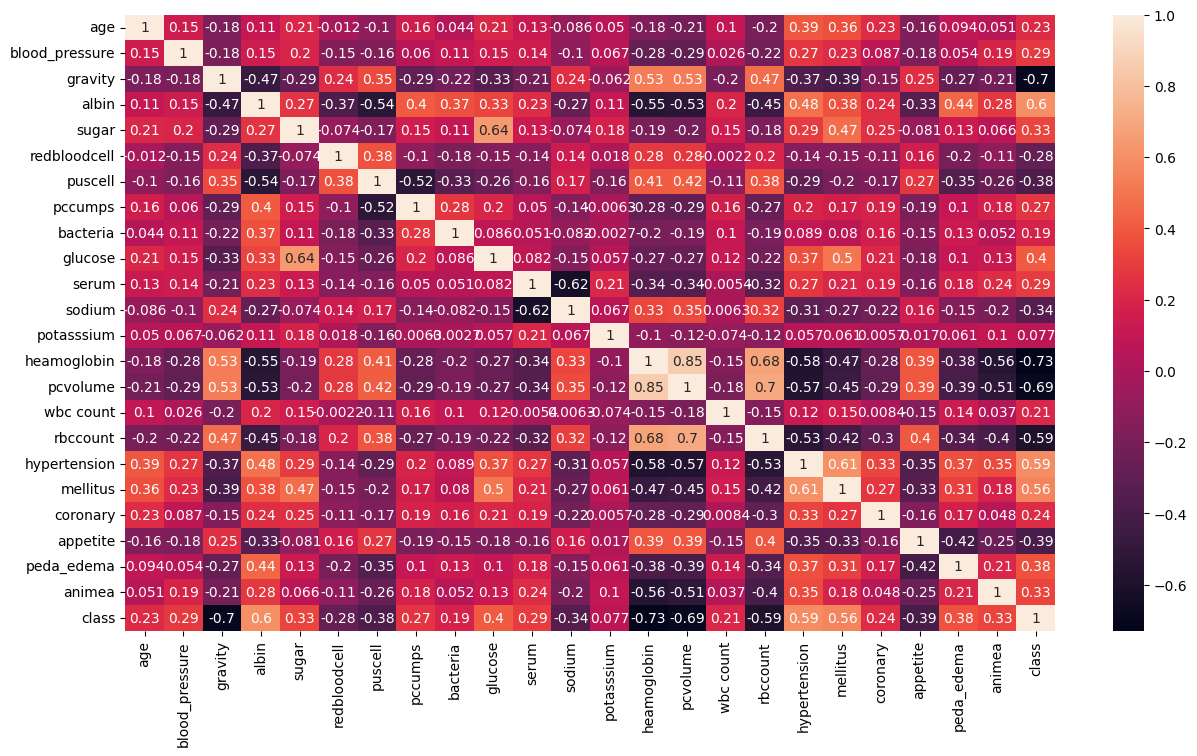

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True)
plt.show()


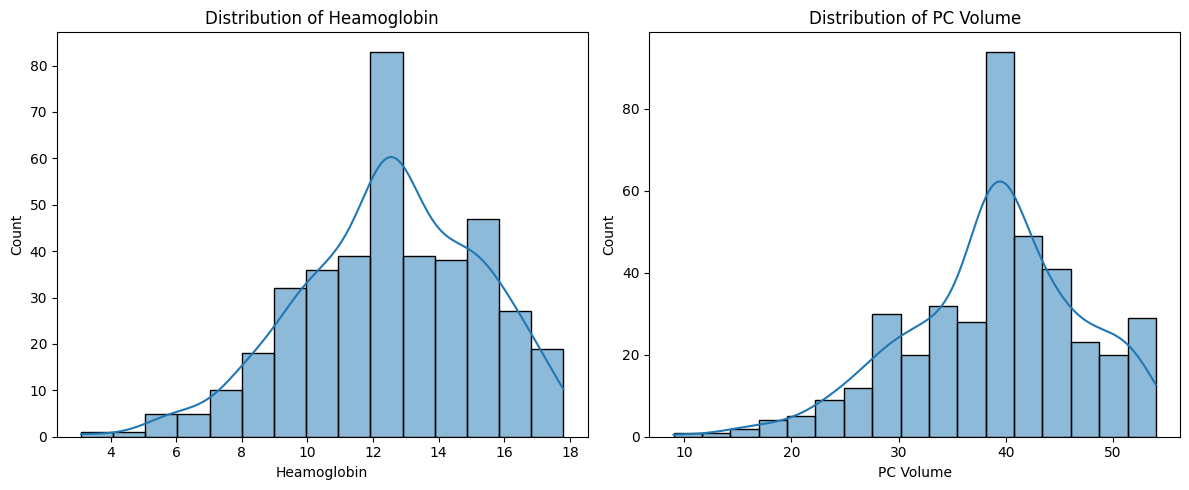

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data['heamoglobin'], kde=True)
plt.title('Distribution of Heamoglobin')
plt.xlabel('Heamoglobin')

plt.subplot(1, 2, 2)
sns.histplot(data['pcvolume'], kde=True)
plt.title('Distribution of PC Volume')
plt.xlabel('PC Volume')

plt.tight_layout()
plt.show()

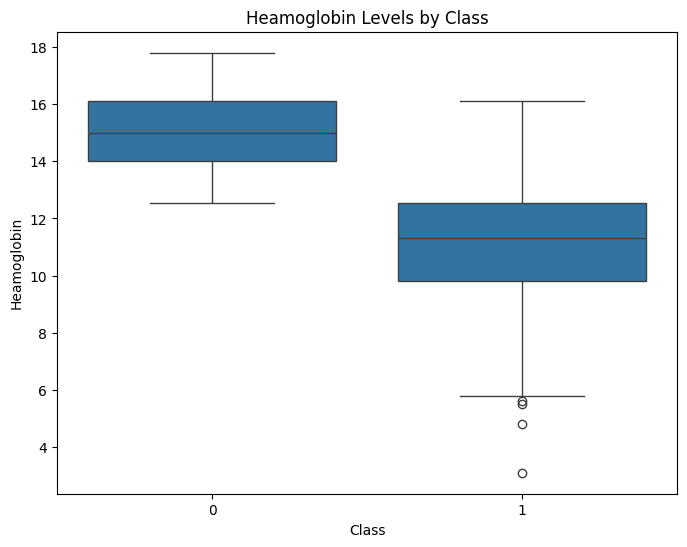

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='class', y='heamoglobin', data=data)
plt.title('Heamoglobin Levels by Class')
plt.xlabel('Class')
plt.ylabel('Heamoglobin')
plt.show()

In [ ]:
data['class'].value_counts()

,count
class,
1,250
0,150


In [ ]:
target_corr=data.corr()['class']
target_corr.sort_values(ascending=False)[1:]

,class
albin,0.599238
hypertension,0.590438
mellitus,0.559060
glucose,0.401376
peda_edema,0.375154
sugar,0.327812
animea,0.325396
serum,0.294076
blood_pressure,0.290600
pccumps,0.265313


In [ ]:
from sklearn.model_selection import train_test_split
x=data.drop('class',axis=1)
y=data['class']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=25)
x.shape,y.shape

((400, 23), (400,))

In [ ]:
x_train.shape,x_test.shape

((300, 23), (100, 23))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=dt.predict(x_test)
y_pred

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1])

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [ ]:
models=[]
models.append(('KNeighborsClassifier',KNeighborsClassifier()))
models.append(('RandomForestClassifier',RandomForestClassifier()))
models.append(('GaussianNB',GaussianNB()))
models.append(('DecisionTreeClassifier',DecisionTreeClassifier()))

In [ ]:
for name,model in models:
  print(name,model)
  print()
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print('Accuracy Score:',accuracy_score(y_test,y_pred))
  print('\n')
  print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
  print('\n')
  print('Precision Score:',precision_score(y_test,y_pred))
  print('\n')
  print('Recall Score:',recall_score(y_test,y_pred))
  print('\n')
  print('F1 Score:',f1_score(y_test,y_pred))
  print('\n')

KNeighborsClassifier KNeighborsClassifier()

Accuracy Score: 0.77


Confusion Matrix:
 [[27 10]
 [13 50]]


Precision Score: 0.8333333333333334


Recall Score: 0.7936507936507936


F1 Score: 0.8130081300813008


RandomForestClassifier RandomForestClassifier()

Accuracy Score: 0.98


Confusion Matrix:
 [[35  2]
 [ 0 63]]


Precision Score: 0.9692307692307692


Recall Score: 1.0


F1 Score: 0.9843749999999999


GaussianNB GaussianNB()

Accuracy Score: 0.95


Confusion Matrix:
 [[37  0]
 [ 5 58]]


Precision Score: 1.0


Recall Score: 0.9206349206349206


F1 Score: 0.9586776859504132


DecisionTreeClassifier DecisionTreeClassifier()

Accuracy Score: 0.95


Confusion Matrix:
 [[35  2]
 [ 3 60]]


Precision Score: 0.967741935483871


Recall Score: 0.9523809523809523


F1 Score: 0.96


